# Contents
1. Building a feed forward NN to categorise reviews into positive and negative
2. Understanding early stopping and why is it needed
3. Dealing with Overfitting
    1. Weight Regularization
    2. Dropout Regularization

In [1]:
from keras.datasets import imdb

C:\Users\Koko\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16 , activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]



history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 183us/step - loss: 0.4715 - acc: 0.8056 - val_loss: 0.3695 - val_acc: 0.8568
Epoch 2/20
20000/20000 [==============================] - 3s 152us/step - loss: 0.2722 - acc: 0.9049 - val_loss: 0.2942 - val_acc: 0.8862
Epoch 3/20
20000/20000 [==============================] - 3s 156us/step - loss: 0.2027 - acc: 0.9307 - val_loss: 0.2700 - val_acc: 0.8910
Epoch 4/20
20000/20000 [==============================] - 3s 158us/step - loss: 0.1671 - acc: 0.9415 - val_loss: 0.2799 - val_acc: 0.8900
Epoch 5/20
20000/20000 [==============================] - 3s 161us/step - loss: 0.1410 - acc: 0.9516 - val_loss: 0.2828 - val_acc: 0.8910
Epoch 6/20
20000/20000 [==============================] - 3s 164us/step - loss: 0.1194 - acc: 0.9593 - val_loss: 0.3079 - val_acc: 0.8870
Epoch 7/20
20000/20000 [==============================] - 3s 157us/step - loss: 0.1063 - acc: 0.9646 - val_loss: 0.3265 - v

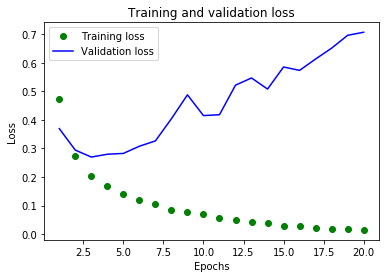

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the above plot , we can clearly see that the models starts overfitting after around epoch 4

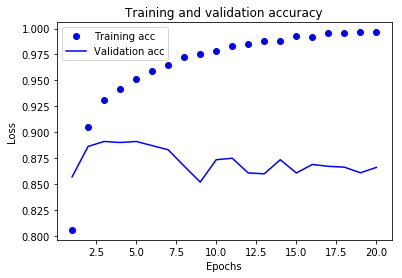

In [8]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Same pattern can be seen on the validation accuracy . Although the training accuracy keeps on increasing , the validation accuracy becomes non-increasing around epoch 4 and then continues to jump between increasing and decreasing

# Early Stopping
How about we stop the model when the improvement stops and use the model at that point as our final model.
Let's train the network till epoch 4 only.

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, 
          y_train, 
          epochs=4, 
          batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 4s 145us/step - loss: 0.4355 - acc: 0.8288
Epoch 2/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.2529 - acc: 0.9118
Epoch 3/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.1964 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 3s 131us/step - loss: 0.1629 - acc: 0.9408


In [11]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 4s 143us/step


[0.2952753042793274, 0.88288]

# Effect of Adding a Regularizer

In [17]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16 , activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


regularized_model = models.Sequential()
regularized_model.add(layers.Dense(16 , kernel_regularizer = regularizers.l2(0.001) ,activation = 'relu' , input_shape=(10000,)))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.Dense(16 , kernel_regularizer = regularizers.l2(0.001),activation='relu'))
regularized_model.add(layers.Dropout(0.5))
regularized_model.add(layers.Dense(1 , activation='sigmoid'))




x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]



history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 4s 183us/step - loss: 0.4729 - acc: 0.8138 - val_loss: 0.3456 - val_acc: 0.8776
Epoch 2/50
20000/20000 [==============================] - 3s 153us/step - loss: 0.2768 - acc: 0.9063 - val_loss: 0.2953 - val_acc: 0.8852
Epoch 3/50
20000/20000 [==============================] - 3s 169us/step - loss: 0.2094 - acc: 0.9267 - val_loss: 0.2777 - val_acc: 0.8896
Epoch 4/50
20000/20000 [==============================] - 4s 177us/step - loss: 0.1707 - acc: 0.9410 - val_loss: 0.2926 - val_acc: 0.8850
Epoch 5/50
20000/20000 [==============================] - 3s 172us/step - loss: 0.1440 - acc: 0.9512 - val_loss: 0.2897 - val_acc: 0.8872
Epoch 6/50
20000/20000 [==============================] - 3s 148us/step - loss: 0.1234 - acc: 0.9574 - val_loss: 0.3301 - val_acc: 0.8776
Epoch 7/50
20000/20000 [==============================] - 3s 153us/step - loss: 0.1038 - acc: 0.9651 - val_loss: 0.3156 - v

In [18]:
regularized_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history_regularized = regularized_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 4s 185us/step - loss: 0.6540 - acc: 0.6445 - val_loss: 0.5346 - val_acc: 0.8158
Epoch 2/50
20000/20000 [==============================] - 3s 153us/step - loss: 0.5211 - acc: 0.7822 - val_loss: 0.4098 - val_acc: 0.8678
Epoch 3/50
20000/20000 [==============================] - 3s 152us/step - loss: 0.4423 - acc: 0.8401 - val_loss: 0.3632 - val_acc: 0.8826
Epoch 4/50
20000/20000 [==============================] - 3s 152us/step - loss: 0.3892 - acc: 0.8740 - val_loss: 0.3612 - val_acc: 0.8814
Epoch 5/50
20000/20000 [==============================] - 3s 152us/step - loss: 0.3522 - acc: 0.8937 - val_loss: 0.3306 - val_acc: 0.8878
Epoch 6/50
20000/20000 [==============================] - 3s 155us/step - loss: 0.3274 - acc: 0.9058 - val_loss: 0.3276 - val_acc: 0.8886
Epoch 7/50
20000/20000 [==============================] - 3s 152us/step - loss: 0.3061 - acc: 0.9127 - val_loss: 0.3478 - v

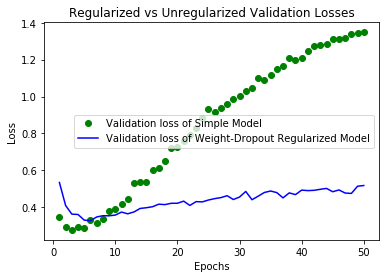

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict_regularized = history_regularized.history
loss_values = history_dict['val_loss']
loss_values_regularized = history_dict_regularized['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'go', label='Validation loss of Simple Model')
plt.plot(epochs, loss_values_regularized, 'b', label='Validation loss of Weight-Dropout Regularized Model')
plt.title('Regularized vs Unregularized Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()